# Funciones de distribución de probabilidades

### Distribución Uniforme

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
a= 1  #Definimos el limite inferior.
b = 100 # Definimos el limite superior.
n = 1000000 #Numero de muestras.
data = np.random.uniform(a, b, n) #Generamos una funcion uniforme con a, b y n

(array([100181., 100008.,  99387.,  99718., 100290., 100296.,  99969.,
        100396.,  99849.,  99906.]),
 array([ 1.00001337, 10.90000942, 20.80000546, 30.70000151, 40.59999755,
        50.4999936 , 60.39998965, 70.29998569, 80.19998174, 90.09997778,
        99.99997383]),
 <BarContainer object of 10 artists>)

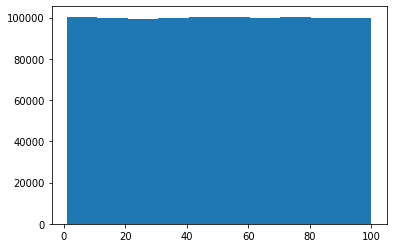

In [75]:
%matplotlib inline 
plt.hist(data) #Creamos una grafica con el historico de data.
#Parecen no ser numeros uniformes pero esto se van haciendo mas uniformes a medida que el numero de muestras es mayor. Este es un problema inherente de que el muestreo es poco si vamos aumentando n la grafica del histograma se va aplanando.

### Distribución normal (Campana de Gaussi)

In [90]:
data = np.random.randn(1000000) #Randn nos permite generar valores en distribucion normal.

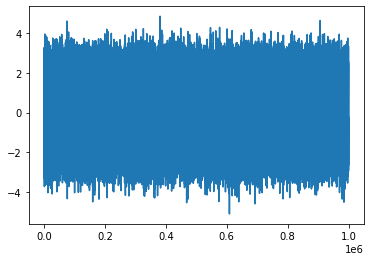

In [91]:
x = range(1,1000001) #Definimos el eje de las x de que valor a que valor van.
plt.plot(x, data) #Se crea un plot con x y en y se define la altura mayor del dato

(array([2.90000e+01, 8.89000e+02, 1.59940e+04, 1.13972e+05, 3.18487e+05,
        3.58732e+05, 1.61078e+05, 2.87930e+04, 1.97200e+03, 5.40000e+01]),
 array([-5.1185456 , -4.12002452, -3.12150345, -2.12298238, -1.1244613 ,
        -0.12594023,  0.87258085,  1.87110192,  2.86962299,  3.86814407,
         4.86666514]),
 <BarContainer object of 10 artists>)

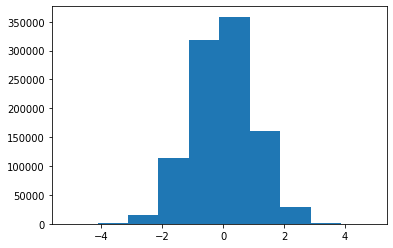

In [92]:
#Se crea el history de data y muestra una campana en los datos. Entre mas numeros tenga data se ve mejor la campana.
plt.hist(data)

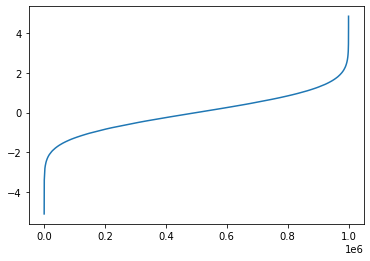

In [94]:
plt.plot(x,sorted(data)) #Ordenamos los datos y creamos un plot para validar que la generación sea gaussiana es decir crece poco en el inicio y el final y se acumula todo entre mas se acerque al 0.

(array([  11.,  102.,  563., 1582., 2783., 2697., 1592.,  534.,  123.,
          13.]),
 array([-3.81296695, -1.94826828, -0.08356961,  1.78112906,  3.64582773,
         5.5105264 ,  7.37522507,  9.23992374, 11.10462241, 12.96932108,
        14.83401975]),
 <BarContainer object of 10 artists>)

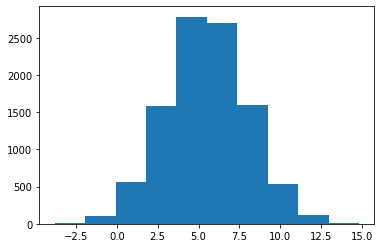

In [99]:
#Crear una normal con otra media que no sea 0 y otra desviación tipica diferente a 1.
#formula origina =  Z = (X -mu) / sd --> N(0,1) -- formula despejada = X = mu + sd * Z  
mu = 5.5 #Definimos el valor de la media.
sd = 2.5 #Definimos la desviación tipica.
Z_10000 = np.random.randn(10000) #Definimos los valores a generar.
data = mu + sd*Z_10000 #Aplicamos la formular para crear una gaussiana con los valores que necesitamos. 
plt.hist(data) #Creamos el histori de data para validar qeu es una campana de gauss.

In [101]:
#Usamos la funcion para crear 2 arreglos de 4 elementos, es lo que normalmente se hace en un data set para generar datos. Estos se generan en distribucion de campana de gauss o distribución normal.
data = np.random.randn(2,4)
data

array([[ 0.55379833,  0.49295766, -0.31207905,  0.76240362],
       [-0.93162915, -0.01605936,  0.43226009,  1.30113997]])

### Simulación de Monte Carlo

* Generamos 2 numeros aleatorios uniforme x y 'y' entre 0 y 1.
* Calcularemos x^2 + Y^2.
    * Si el valor es inferior a 1  --> Estamos dentro del circulo.
    * Si el valor es superior a 1  --> Estamos fuera del circulo.
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimiento un numero suficiente de veces ej(1000), para obtener diferentes aproximaciones de π.
* Calculamos el promedio de los 1000 experimientos anteriores para dar un valor final de  π.
    



In [190]:
def pi_montecarlo(n, n_exp): #Definimos la funcion y se requiere n que es el numero de puntos en simulación y n_exp el numero de veces que se hara la simulación.
    pi_avg = 0 #Inicializamos la variable pi_avg en 0 y despues asignarle un valor.
    pi_value_list = [] # Creamos una lista vacia para ir agregando valores que se generaran.
    for i in range(n_exp): #Creamso un for para recorrer el numero de simulaciones que se haran.
        value = 0 #Creamos la variable value y la inicializamos en 0.
        x = np.random.uniform(0, 1, n).tolist() #Cramos una lista con  n objetos, con valores entre 0 y 1 de manera uniforme.
        y = np.random.uniform(0, 1, n).tolist() #Cramos una lista con  n objetos, con valores entre 0 y 1 de manera uniforme.
        for j in range(n): #Creamos un ciclo para recorrer los objetos en los objetos definidos por n.
            z = np.sqrt(x[j] * x[j] + y[j] * y[j]) # Definimos la formula z = x^2 + y^2 del valor que se esta leyendo en el ciclo.
            if z<=1: #Validamos si z es menor o igual que 1.
                value += 1 #Incrementamos en 1 la variable value.
        float_value = float(value) # Convertimos en flotante la variable value.
        pi_value = float_value*4/n #Creamos pi value y lo multiplicamos por 4 y dividimos entre el numero de objetos creados en la simualación.
        pi_value_list.append(pi_value) # Agregamos el valor de pi_value a la lista.
        pi_avg += pi_value # asignamos el valor de pi_value a pi_avg.
        

    pi = pi_avg/n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)
        

3.142357999999999


(3.142357999999999, [<matplotlib.lines.Line2D at 0x22f022f5ca0>])

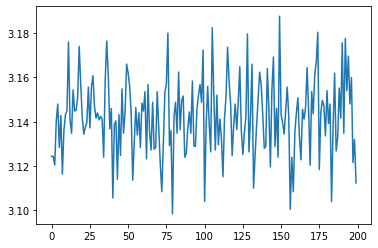

In [191]:
pi_montecarlo(10000, 200)